**Column Details:**
* **review:** Contains the description of the review.
* **ratings:** Contains the rating of the review(1-5)

In [67]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt_tab')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [74]:
df = pd.read_csv("/content/flipkart_data.csv")
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [75]:
df.shape

(9976, 2)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


In [77]:
df.describe()

,rating
count,9976.000000
mean,4.215417
std,1.167911
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [78]:
df['rating'].unique()

array([5, 4, 1, 3, 2])

There is no inconsistency in the ratig columns.

In [79]:
# Let's check for any null values
df.isnull().sum()

,0
review,0
rating,0


Luckily no null values.

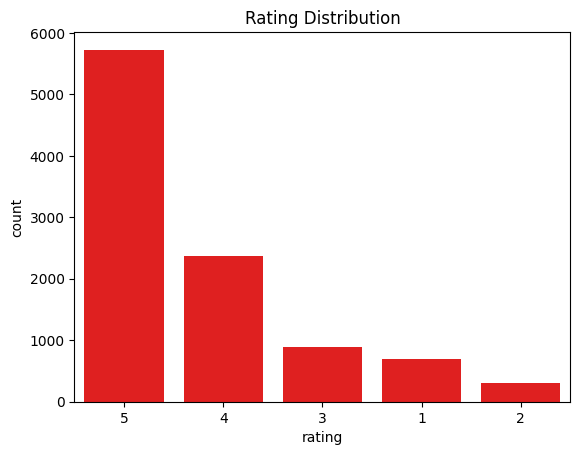

In [80]:
# Let's check the distribution of the rating attribute
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, color='red')
plt.title("Rating Distribution")
plt.show()

For this example we are considering all the ratings equal or above 5 as positive review and others as negative review.

In [81]:
# Defining label column
df['label'] = df['rating'].apply(lambda x: x>=5, 1, 0)

In [82]:
df['label'].value_counts()

,count
label,
True,5726
False,4250


Preprocess the review description.

In [60]:
# # Preprocess the data
# def preprocess(sentence):

#     # Remove punchuation marks
#     sentence = re.sub(r'[^\w\s]', '', sentence)

#     # Remove Stop words

#     return sentence
# df['review'] = df['review'].apply(preprocess)
# df['review']

In [83]:
#converting all the text in the dataset to lowercase
def prep_text(text):                                  # preprocessing function
    text = text.lower()                          #convert all text to lower case
    #Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)          #Remove punctuation and special characters using regex

    #tokenize the text
    tokens = word_tokenize(text)                  # conerting each lines into tokens

    #removing stopwords
    stop_words = set(stopwords.words('english'))                              #setting up stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]     #filtering all the tokens against stopwords
    return filtered_tokens
df['review'] = df['review'].apply(prep_text)
df['review'] = df['review'].apply(lambda x: " ". join(map(str, x)))           #list to sentence
df['review']

,review
0,nice produt like design lot easy carry looked ...
1,awesome soundvery pretty see nd sound quality ...
2,awesome sound quality pros 78 hrs battery life...
3,think good product per quality also design qui...
4,awesome bass sound quality good bettary long l...
...,...
9971,goodread
9972,everything amazimg built lightread
9973,goodread
9974,best headphone ever usedread


In [84]:
preprocessed_review = df['review'].values
df['review'] = preprocessed_review
df.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,True
1,awesome soundvery pretty see nd sound quality ...,5,True
2,awesome sound quality pros 78 hrs battery life...,4,False
3,think good product per quality also design qui...,5,True
4,awesome bass sound quality good bettary long l...,5,True


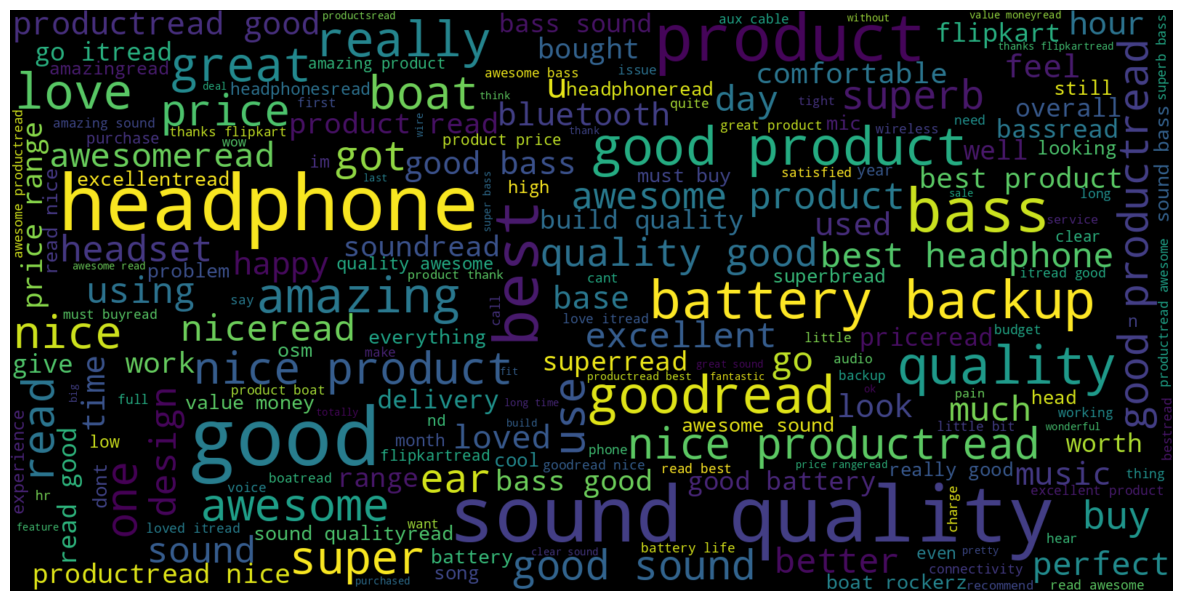

In [88]:
consolidated = ' '.join(
    word for word in df['review'][df['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110)

plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [89]:
#Converting text into vectors

cv = TfidfVectorizer(max_features=2500)
x = cv.fit_transform(df['review']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Model training, Evaluation and Prediction.

In [90]:
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, df['label'], test_size=0.33, stratify=df['label'], random_state=42)

In [91]:
# Model Training
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [92]:
# Finding accuracy score
print("Training Accuracy: ", accuracy_score(model.predict(x_train), y_train))
print("Testing Accuracy: ", accuracy_score(model.predict(x_test), y_test))

Training Accuracy:  0.9247344007182403
Testing Accuracy:  0.6765866990586091


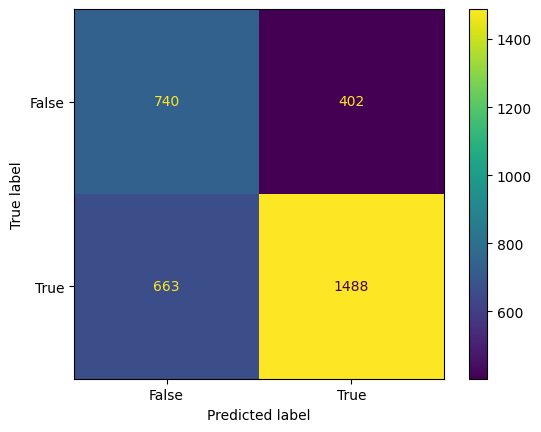

In [98]:
#Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(model.predict(x_test), y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

The model is overfitting since our morel is performing well on training not so well on testing.
We can fix it by some boositng methods.

Thank you for going through my work till the end, feel free to get in touch if you have any questions... :)